## Homework 2

###### Guidelines to be followed (we can discuss and adjust of course, but to be consistent in the way we code)

- Jupyter Notebook should **not contain too much code** (the less code is stored here the better since it makes things much clearer)
- Pure code should be stored in **seperate .py files** (easier to review and better for version control)
- Lets try to **comment** everything we do from the beginning so that we don't have to do this boring and annoying work at the end
- Every time we have the chance of **plotting** some information lets try to do it (data visualisation is very important)

#### Some useful data set information

- Each row represents an event. There are several different types of events however:
    - **View**: A user viewed a product
    - **Cart**: A user added a product to a shopping cart
    - **Removefromcart**: A user removed a product from the shopping cart
    - **Purchase**: A user purchased a product
    
    
- A typical funnel of a client would be (leading to 3 different rows in the dataset: view >> cart >> purchase)


- **event_time**: Time of the event
- **event_type**: Event type (see above for event types)
- **product_id**: Unique identifier of product
- **category_id**: Category ID of product
- **category_code**: Code of category. If product is not a relevant one the category code is left empty (meaningfull missing)
- **brand**: Brand of product (can be missing, I guess this is not a meaningful missing)
- **price**: Float price of product
- **user_id**: Unique identifier of user
- **user_session**: Unique identifier of user session (1 *user_id* can have several *user_session* over time)


- **Example**: User with *userid* during session *usersession* added to shopping cart (*eventtype == cart*) the product *productid* of the brand *brand* of category *categorycode* with a given *price* at a given *event_time* 


**Some useful info**

1. Price is unique by product_id and event_time
    - y =full_data_set.groupby([full_data_set.event_time, full_data_set.product_id]).price.nunique()
    - len(y) == y.sum()

In [60]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import library and files

In [5]:
import pickle
import pandas as pd
import functionality as funcs
import re

#### Function loaded from functionality.py

#### I recommend storing data as a pickle file (much faster to read and work with)

In [ ]:
Oct_2019_data = pd.read_csv('data/2019-Oct.csv')
Nov_2019_data = pd.read_csv('data/2019-Nov.csv')

#### Save with pickle format

In [ ]:
Oct_2019_data.to_pickle('data/2019_Oct.pickle')
Nov_2019_data.to_pickle('2019_Oct.pickle')

#### Partially read data

In [3]:
# import pandas as pd
# import random


# # Count the lines or use an upper bound
# num_lines_oct = sum(1 for l in open('data/2019-Oct.csv'))
# num_lines_nov = sum(1 for l in open('data/2019-Nov.csv'))

# size_oct = int(num_lines_oct / 1000)
# size_nov = int(num_lines_nov / 1000)

# # The row indices to skip - make sure 0 is not included to keep the header!
# skip_idx_oct = random.sample(range(1, num_lines_oct), num_lines_oct - size_oct)
# skip_idx_nov = random.sample(range(1, num_lines_nov), num_lines_nov - size_nov)

# # keep the header, then take only 1% of lines
# # if random from [0,1] interval is greater than 0.01 the row will be skipped
# Oct_2019_data = pd.read_csv('data/2019-Oct.csv', skiprows=skip_idx_oct)
# Nov_2019_data = pd.read_csv('data/2019-Nov.csv', skiprows=skip_idx_nov)


print('Oct')
Oct_2019_data = pd.read_csv('data/2019-Oct.csv', nrows=200000,
                      parse_dates = ['event_time'],
                      date_parser = pd.to_datetime)
print('Nov')
Nov_2019_data = pd.read_csv('data/2019-Nov.csv', nrows=200000,
                      parse_dates = ['event_time'],
                      date_parser = pd.to_datetime)

print('Full')
full_data_set = pd.concat((Oct_2019_data, Nov_2019_data), ignore_index=True)

Oct
Nov
Full


#### Basic Data Manipulations

## Research Question 1

A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond. Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase. Which is the rate of complete funnels?
- What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).
- How many times, on average, a user views a product before adding it to the cart?
- What’s the probability that products added once to the cart are effectively bought?
- What’s the average time an item stays in the cart before being removed?
- How much time passes on average between the first view time and a purchase/addition to cart?


**Comments**:

Zhibek


In [ ]:
# 1.b.
x = full_data_set[(full_data_set.event_type == 'view') | (full_data_set.event_type == 'cart')].groupby(['user_id']).event_type.nunique()
user_view_and_cart_list = x[x==2].index
user_view_and_cart_data_set = full_data_set[full_data_set.user_id.isin(user_view_and_cart_list)]
user_view_and_cart_data_set[(user_view_and_cart_data_set.event_type == 'view') | (user_view_and_cart_data_set.event_type == 'cart')].groupby(['user_id', 'event_type']).product_id.count()
user_view_and_cart_data_set[(user_view_and_cart_data_set.event_type == 'view')].groupby(['user_id']).product_id.count().mean()

## Research Question 2

What are the categories of the most trending products overall? For each month visualize this information through a plot showing the number of sold products per category.
- Plot the most visited subcategories.
- What are the 10 most sold products per category?


**Comments**:

Questions to be answered are:

- *What are the categories of the most trending products*: 
- *Plot the most visited subcategories*: Generate a new column with the subcategories. For each sub-category count the number of visits
- *What are the 10 most sold products per category?*: Groupby category and product_id. Compute the sum of the price. Sort the values of the sum and keep the top 10.


In [7]:
full_data_set['category_code'] = full_data_set.category_code.fillna('missing_category_code')

# Convert event time into month
full_data_set['event_time'] = full_data_set.event_time.dt.month
full_data_set['subcategory_code'] = full_data_set['category_code'].apply(lambda x: re.findall(r'\.(.*)', x)[0] if len(x.split('.')) != 1 else x)

full_data_set_view = full_data_set[full_data_set.event_type == 'view']
full_data_set_purchase = full_data_set[full_data_set.event_type == 'purchase']

In [11]:
# What are the categories of the most trending products
num_trending_products = 10
x = full_data_set_purchase.groupby(['event_time', 'category_code', 
                                    'category_id', 'product_id']).price.count()
x.groupby(level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(num_trending_products))

event_time  category_code                category_id          product_id
10          electronics.smartphone       2053013555631882655  1004856       150
                                                              1004767       127
                                                              1002544        78
                                                              1004870        62
                                                              1004833        56
            electronics.audio.headphone  2053013554658804075  4804056        52
            electronics.smartphone       2053013555631882655  1005115        50
                                                              1004873        42
                                                              1004741        38
                                                              1004249        35
11          electronics.smartphone       2053013555631882655  1004856       145
                                               

In [12]:
# Plot the most visited subcategories
x = full_data_set_view.groupby(['event_time', 'category_code', 'subcategory_code']).price.count()
x = x.groupby(level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(num_trending_products))


event_time  category_code                     subcategory_code     
10          missing_category_code             missing_category_code    63019
            electronics.smartphone            smartphone               49936
            electronics.clocks                clocks                    6077
            computers.notebook                notebook                  5759
            electronics.audio.headphone       audio.headphone           4757
            electronics.video.tv              video.tv                  3863
            appliances.kitchen.refrigerators  kitchen.refrigerators     3516
            apparel.shoes                     shoes                     3340
            appliances.environment.vacuum     environment.vacuum        3118
            appliances.kitchen.washer         kitchen.washer            3117
11          missing_category_code             missing_category_code    65388
            electronics.smartphone            smartphone               49083
        

In [14]:
# What are the 10 most sold products per category?
x = full_data_set_purchase.groupby(['event_time', 'category_code', 'category_id', 'product_id']).price.count()
x.groupby(level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10))

event_time  category_code                category_id          product_id
10          electronics.smartphone       2053013555631882655  1004856       150
                                                              1004767       127
                                                              1002544        78
                                                              1004870        62
                                                              1004833        56
            electronics.audio.headphone  2053013554658804075  4804056        52
            electronics.smartphone       2053013555631882655  1005115        50
                                                              1004873        42
                                                              1004741        38
                                                              1004249        35
11          electronics.smartphone       2053013555631882655  1004856       145
                                               

## Research Question 3

For each category, what’s the brand whose prices are higher on average?
- Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.
- Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.


**Comments**:

I am doing the average without doing any kind of event_type filter, would this give me the wanted price value? If not I would not know by what event type to filter...
Maybe intuitevly we should do this exercise over unique product_ids (so what is the average price over unique products over brand and category)

**Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.**

Before doing any analysis we have reviewed the columns of interest and have detected that many brands are missing. This is obviously a data issue, but it can still give us relevant information (we can assume that missing brand names are from unknown brands). For this reason we will categorize missing brand values with the value 'unknown_brand'. 

We will group by category and brand, computing the average price. Once we have this result we will sort the resulting average price and keep the first observation of each group.

*Most up-to-date*
1. Replace missing brand values with unknown_brand >> Missing brands might be from not famous brands, therefore these missing observations could still be useful for our client
2. Our data set is organized based on events. We are not interested in the events, we are only interested in the price of the products of the brand (which is unique at product_id and event_time level).
3. A unique price can be obtained by dropping duplicates based on category_id, brand, product_id and event_time.dt.month
4. After dropping all the non-unique rows of category_id, brand, product_id and event_time.dt.month we compute the average price of a product at month level and then compute the average of the resulting price over the whole brand

Question regaring the plot is equal with the only difference that we would first filter the by the category_id


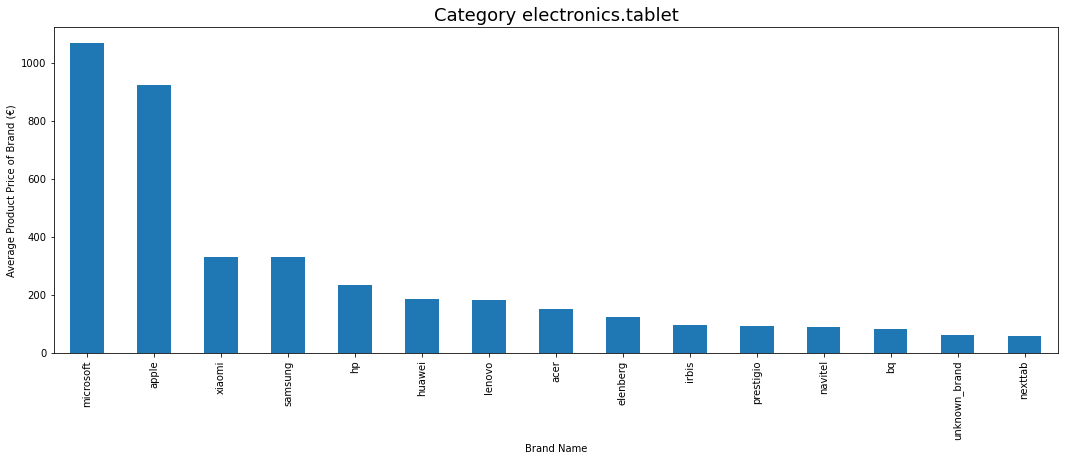

In [200]:
funcs.plot_average_price_brand_category(data_set=full_data_set, 
                                        category_id=2172371436436455782, 
                                        missing_treatment='unknown_brand')

In [201]:
sorted_series, highest_price_brands = funcs.category_brand_highest_price(full_data_set, 'unknown_brand')

In [202]:
sorted_series

category_id          brand        
2053013552226107603  deton            463.185000
                     milwaukee        233.810000
                     tefal             75.866667
                     polaris           34.405000
                     cata              30.960000
                                         ...    
2175419595093967522  yema              48.650000
2179887840530268640  greyder          120.980000
                     unknown_brand      0.000000
2180736567012753620  witerra           26.920000
                     unknown_brand      0.000000
Name: price, Length: 7448, dtype: float64

In [203]:
highest_price_brands

category_id          brand    
2053013552226107603  deton         463.185
2053013552259662037  fondital     2310.070
2053013552293216471  volcano       326.910
2053013552326770905  sunsystem    1174.655
2053013552351936731  panasonic    1242.477
                                    ...   
2172371436436455782  microsoft    1070.908
2173216765583032544  jordan        102.710
2175419595093967522  masei         308.630
2179887840530268640  greyder       120.980
2180736567012753620  witerra        26.920
Name: price, Length: 618, dtype: float64

## Research Question 4

How much does each brand earn per month? Write a function that given the name of a brand in input returns, for each month, its profit. Is the average price of products of different brands significantly different?
- Using the function you just created, find the top 3 brands that have suffered the biggest losses in earnings between one month and the next, specifing bothe the loss percentage and the 2 months (e.g., brand_1 lost 20% between march and april).


**Comments**:

Zhibek

## Research Question 5

In what part of the day is your store most visited? Knowing which days of the week or even which hours of the day shoppers are likely to visit your online store and make a purchase may help you improve your strategies. Create a plot that for each day of the week show the hourly average of visitors your store has.


**Comments**:

Nicola 

In [19]:
import matplotlib.pyplot as plt

In [4]:
full_data_set_view = full_data_set[full_data_set.event_type == 'view']
full_data_set_view.loc[:, 'event_time_month'] = full_data_set_view.event_time.dt.month
full_data_set_view.loc[:, 'event_time_week_year'] = full_data_set_view.event_time.dt.weekofyear
full_data_set_view.loc[:, 'event_time_week'] = full_data_set_view.event_time.dt.dayofweek
full_data_set_view.loc[:, 'event_time_hour'] = full_data_set_view.event_time.dt.hour

C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have be

In [23]:
# Question 1
final_group = full_data_set_view.groupby(['event_time_hour']).user_id.count().sort_values(ascending=False)
final_group

event_time_hour
8     289950
7     288605
6     282316
5     268755
9     240471
4     230729
13    205311
16    200050
10    198272
3     192166
15    189350
14    187821
11    186603
12    186204
17    178861
18    137287
2     123051
19     92183
1      53399
20     51010
0      32552
21     30464
22     17820
23     13933
Name: user_id, dtype: int64

Text(0, 0.5, 'Hourly average of visitors')

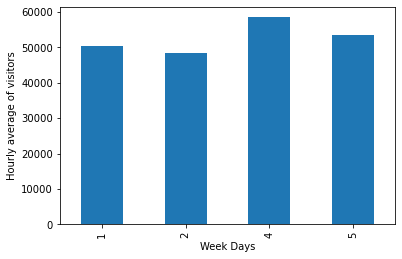

In [21]:
# Question 2
final_group = full_data_set_view.groupby(['event_time_week', 
                                          'event_time_hour', 
                                          'event_time_week_year']).user_id.count().groupby(['event_time_week', 
                                                                                            'event_time_hour']).mean().groupby(['event_time_week']).mean()
final_group.plot.bar()
plt.xlabel('Week Days')
plt.ylabel('Hourly average of visitors')

## Research Question 6

The conversion rate of a product is given by the purchase rate over the number of times the product has been visited. What's the conversion rate of your online store?
- Find the overall conversion rate of your store.
- Plot the number of purchases of each category and show the conversion rate of each category in decreasing order.


**Comments**:

1. Overall conversion rate computes the overall purchases the online store had to the number of views the online store
2. Estimate the number of views and number of purchases at category level and estimate the purchase rate from these values.
    - Is there any difference between purchase and conversion rate? (I am assuming they are the same for this exercise)
    - If this is the case the plot is not very ilustrative to be honest, think of a better ilustration strategy

https://www.tagmanageritalia.it/glossario-conversione/

3. Purchase rate: 
3. Conversion rate: Numero di vistatore unichi che hanno fatto un aquisto

In [40]:
conversion_rate = funcs.conversion_rate(full_data_set)
conversion_rate

0.0187

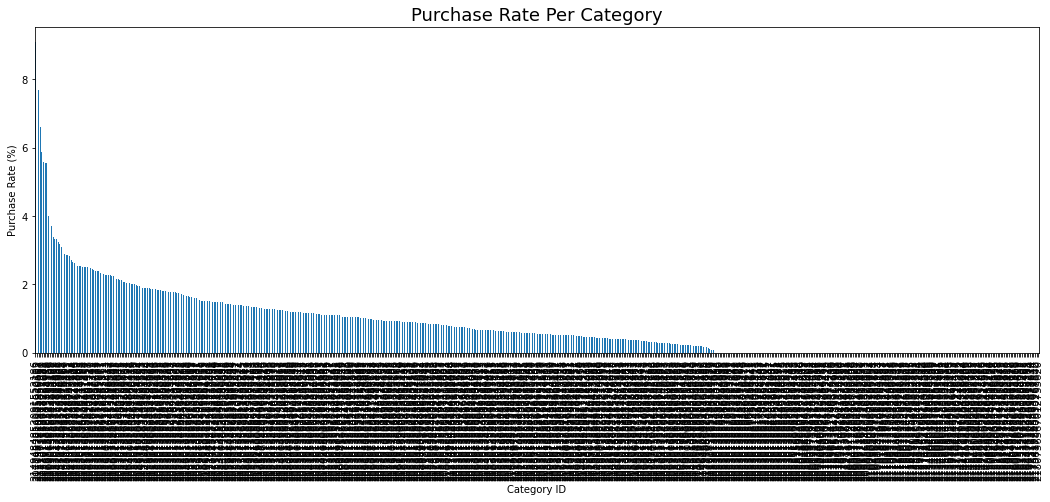

In [41]:
sorted_conversion_rates_per_category = funcs.conversion_rate_per_category(full_data_set)

In [42]:
sorted_conversion_rates_per_category

category_id
2149484852091552186    9.090909
2077453854185620383    8.536585
2110937219005940617    7.692308
2151563850841850061    6.603774
2172371118332051820    5.882353
                         ...   
2172371122509578610    0.000000
2173216765583032544    0.000000
2175419595093967522    0.000000
2179887840530268640    0.000000
2180736567012753620    0.000000
Name: purchase_rate, Length: 618, dtype: float64

## Research Question 7

The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your customers.
- Prove that the pareto principle applies to your store.


**Comments**:

1. Construct table with the income at user_id level (when event_type == 'purchase' what is the price paid by each user)
2. Construct array with the cumulative percentage of users and income
3. Construct illustrative plot to demonstrate pareto from the previous arrays

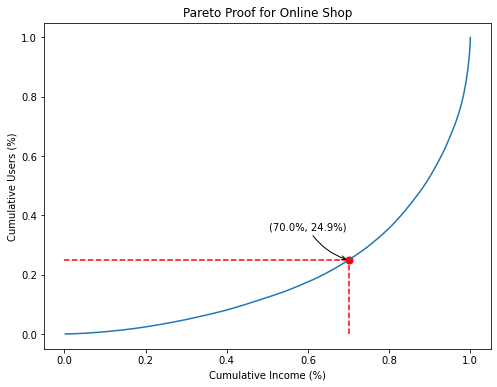

In [13]:
funcs.pareto_proof_online_shop(full_data_set, income_threshold=0.7)

user_id    event_type
384989212  cart          1
           view          8
386070015  cart          1
           view          4
452859779  cart          2
                        ..
566326800  view          1
566327011  cart          1
           view          1
566327173  cart          1
           view          2
Name: product_id, Length: 6512, dtype: int64

7.090601965601966